# Loading Libraries

In [0]:
# If we use different environment than Google Colab
# We need use comend to install tensorflow: 
# !pip install --upgrade -q tensorflow

%tensorflow_version 2.x

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.2.0


# Load Data and preparation Data

In [3]:
(X_train,y_train), (X_test, y_test) = load_data()
print(f'X_train shape:  {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [0]:
X_train=X_train/255.
X_test=X_test/255.

# Data mining

(-0.5, 27.5, 27.5, -0.5)

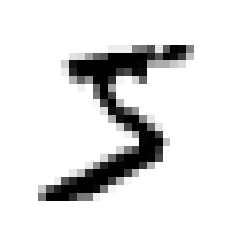

In [8]:
# Display example 
plt.imshow(X_train[0],cmap='gray_r')
plt.axis('off')

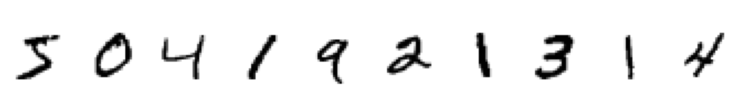

In [9]:
# Display first 10 images
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1],cmap='gray_r')
  plt.title(y_train[i-1],color='white', fontsize=16)
plt.show()

# Construction of a neural network

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Training models

In [20]:
history= model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1413 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1057 - accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9769


# Evaluation of the results 

In [21]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0734 - accuracy: 0.9775


[0.07341457158327103, 0.9775000214576721]

In [22]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.296208,0.914883
1,0.141254,0.958133
2,0.105722,0.968433
3,0.087684,0.972767
4,0.074588,0.976933


In [25]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

# Prediction based on the model

In [26]:
model.predict(X_test)

array([[0.000000023916, 0.000000028977, 0.0000107894  , ..., 0.9998784     , 0.000000048109, 0.000010580129],
       [0.000000083989, 0.000014195864, 0.9999652     , ..., 0.            , 0.000000061928, 0.            ],
       [0.000000334031, 0.99931526    , 0.00004649459 , ..., 0.00035287882 , 0.00019191489 , 0.000000550128],
       ...,
       [0.            , 0.000000000617, 0.000000000006, ..., 0.000038430513, 0.000001402088, 0.0004468514  ],
       [0.00000000905 , 0.000000000836, 0.000000000001, ..., 0.000000009232, 0.000003085019, 0.000000000006],
       [0.00000003138 , 0.000000000051, 0.00000003785 , ..., 0.            , 0.000000000059, 0.000000000065]],
      dtype=float32)

In [28]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred,
                                                           columns=['y_pred'])],
                  axis=1)
pred.head()

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [30]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([247, 259, 321, 381, 445, 495, 582, 610, 659, 684], dtype='int64')

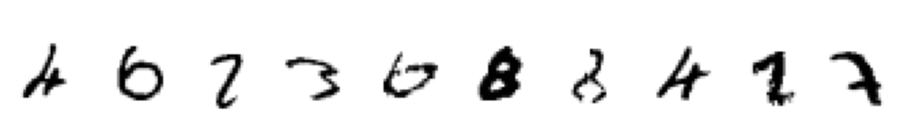

In [31]:
plt.figure(figsize=(16,16))
for i ,j in zip(range(1,11),misclassified.index[:10]):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white',
            fontsize=12)
plt.show()